In [1]:
### 4C16 Lab 4 - Feedforward Neural Nets for Image Classification.

In [2]:
# Import the necessary modules

import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.regularizers import l2

from keras.models import model_from_json

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [3]:
# Define some useful functions
class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])
        plt.subplot(121) 
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()
        plt.subplot(122)         
        plt.plot(self.x, self.acc, label="training accuracy")
        plt.plot(self.x, self.val_acc, label="validation accuracy")
        plt.legend()
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.title('Model Accuracy')
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();
        
        print("Training Accuracy: ", self.acc)
        
def save_model_to_disk():    
    # save model and weights (don't change the filenames)
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to model.json and weights to model.h5")

loading the dataset...
loaded.
let's look at some of the pictures and their ground truth labels:


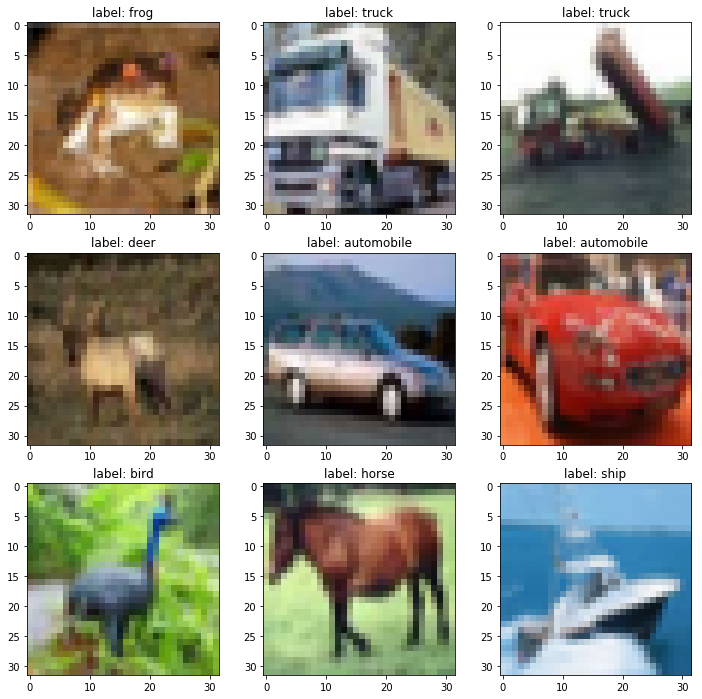

In [4]:
print('loading the dataset...')

pkl_file = open('/home/tcd/codiad/workspace/data/cifar10-dataset.pkl', 'rb')
dataset = pickle.load(pkl_file)

print('loaded.')

print('let\'s look at some of the pictures and their ground truth labels:')

plt.figure(figsize=(12,12))
plt.plot([3, 3])

X = dataset['X'].astype('float32')/255
Y = dataset['Y'].astype('float32')
Y = keras.utils.to_categorical(Y)

for i in range(0,9):
    # pictures are 32x32x3 (width=32, height=32, 3 colour channels)
    pic = X[i]

    # Y[i] returns an array of zeros and with Y[i][classid] = 1
    # for instance  Y[i] = [ 0 0 0 0 0 1 0 0 0 0] => classid=5 
    #          and  Y[i] = [ 1 0 0 0 0 0 0 0 0 0] => classid=0
    # we can get the classid by using the argmax function on the vector Y[i]
    classid = Y[i].argmax(-1)

    # getting back the name of the label for that classid
    classname = dataset['labels'][classid]
    plt.subplot(3,3,i+1)
    plt.imshow(pic)
    plt.title('label: {}'.format(classname))


In [5]:
# let's split data between validation set and training set

X_train, X_validation, Y_train, Y_validation = skl.model_selection.train_test_split(X, Y, test_size=.1, random_state=0)

In [6]:
# the data structure is a tensor, ie. it is a multidimensional array
# each layer instance is callable on a tensor, and returns a tensor

# The model below contains 2 hidden layers with 30 nodes each. 
# The activation functions for these 2 layers is the ReLU
# The network ends with a 10 nodes layer with softmax activation
# The first 2 hidden layers transform the original features into 
# a new feature vector of size 30.
# The last layer essentially does the classification using multonomial regression
# based on these new features. 

inputs = keras.layers.Input(shape=(32, 32, 3))
x = Flatten()(inputs)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 2% to prevent overfitting
x = Dense(800, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 25% to prevent overfitting
x = Dense(800, activation='relu')(x)
x = Dropout(0.3)(x) # Drop out random 25% to prevent overfitting



predictions = Dense(10, activation='softmax')(x)

# we create the model 
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.99, nesterov=True)
# opt = keras.optimizers.Adadelta()

# setup the optimisation strategy
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

if (model.count_params() > 10000000):    
    raise("Your model is unecessarily complex, scale down!")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               800800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 800)               640800    
__________

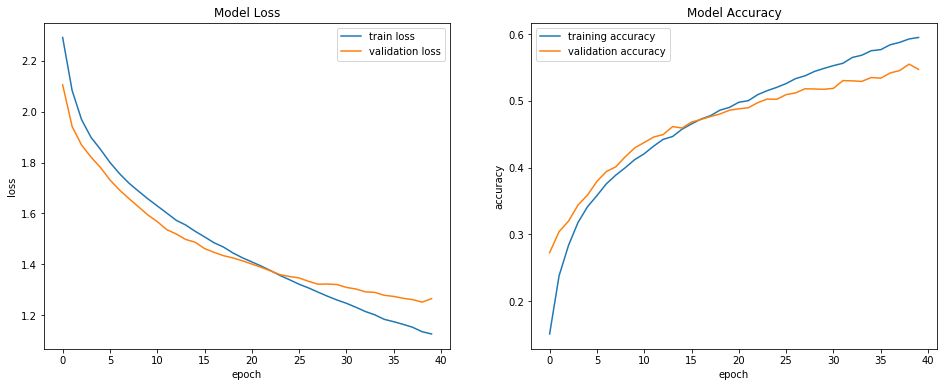

Training Accuracy:  [0.15111111159324647, 0.2382222212632497, 0.28380000009536743, 0.31791111097335817, 0.34137777892748516, 0.3581333332432641, 0.37582222321298386, 0.3888444432046678, 0.39995555520587495, 0.4120222219467163, 0.4207555544535319, 0.43220000095367433, 0.4422666658772363, 0.44655555463367036, 0.4575111103375753, 0.46537777737511526, 0.47262222142219545, 0.47766666648652817, 0.48593333365652297, 0.4900666664865282, 0.49777777743869356, 0.5001333345890046, 0.5091777797593011, 0.5151333350499471, 0.5200444438404507, 0.525777777618832, 0.5331333307796055, 0.5373555563290914, 0.5439333308855693, 0.548444442929162, 0.5525777794837952, 0.5560888893975152, 0.564799998219808, 0.568199999194675, 0.5749111090660095, 0.5764666687753466, 0.5838000024795532, 0.5873777776400249, 0.592511112054189, 0.5947333312458463]


In [7]:
# we create a callback function to plot our loss function and accuracy
pltCallBack = PlotLossAccuracy()

# and train
model.fit(X_train, Y_train,
          batch_size=4096, epochs=40, 
          validation_data=(X_validation, Y_validation), 
          callbacks=[pltCallBack])


In [8]:
# write model to model.json and weights to model.h5 for submission

save_model_to_disk()

Saved model to model.json and weights to model.h5


In [9]:
# In the terminal, add these files to git and submit the lab
# Do the following: 
#  git add lab-04/model.json
#  git add lab-04/model.h5
#  git commit -m "Added NN model."
#  git push
#  submit-lab 4

In [10]:
# Question 1: design a network only using Dense layers and achieve 50% accuracy on the server's test set
#
#  Do 'git commit -a -m "model update"' followed by 'submit-lab 4' to check your solution.
#
# Question 2: design a network using Dense layers and achieve 55% accuracy on the server's test set
#
# You may want to test the following:
#
# Change the architecture: 
#    for instance you may want to add layers, 
#    change the number of units per layer, 
#    change the activation functions
#
#    !!! now, don't go mad, we know you can get 55% accuracy with only 3 Dense layers.
#
# Always check on your accuray and loss graphs that that you are not overfitting. 
#
# Remember that you can help avoiding overfitting using 
#   - Dropout [https://keras.io/layers/core/#dropout]
#   - Regularisers (eg. L2, L1) [https://keras.io/regularizers/]
#
# Optimiser. You may get faster convergence using different optimiser that rmsprop (but rmsprop is not bad)
#
# Learning Rate. You can tune it.
##
# Also note that Deeper networks will require longer training times.
#
# Good luck!
#
#
# F.A.Q.
#
#   I reached 51% on my validation set, but the submission didn't pass, how come? 
#     > the test set on the server is different from your validation set
#   can I use convolutional layers? 
#     > No.
#


